# EDA for the considered systems

The goal of this notebook is to simply explore the available data used in this study. We consider the main questions:

* How data are distributed (data imbalance)?
* What are the range of the features?
* How the features are correlated (if correlated)?

This way, we may have insights on how to design a proper approach to apply neural networks, as well as to known limitations and what we can cover or not with our proposed approach.

## Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

## Exploratory Data Analysis

### Reading the data

Defining the data path conveniently:

In [2]:
DATA_PATH = Path('../data')

Reading the data into a `pandas.DataFrame`:

In [3]:
df_all_data_points = pd.read_csv(DATA_PATH / "experimental" / "training_data_extended.csv")

df_all_data_points

,FP,MM,lnPvap,Method,NC,C=C,s,System
0,374.70,186.29,1.83,0,11,0,407.7000,Methyl Decanoate
1,370.60,183.49,2.44,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
2,365.60,180.68,2.82,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
3,360.60,175.07,3.31,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
4,354.60,169.46,3.64,0,10,0,750.2000,Methyl Octanoate + Methyl Decanoate
...,...,...,...,...,...,...,...,...
485,346.88,238.19,4.62,0,10,0,756.8853,Butanol + Ethyl Myristate
486,315.92,116.19,6.70,0,11,0,822.0956,Butanol + Ethyl Palmitate
487,319.28,158.26,6.41,0,11,0,822.0956,Butanol + Ethyl Palmitate
488,322.64,200.33,6.01,0,11,0,822.0956,Butanol + Ethyl Palmitate


### Check how data is distributed by features

#### Flash-point

Histogram:

<Figure size 800x600 with 0 Axes>

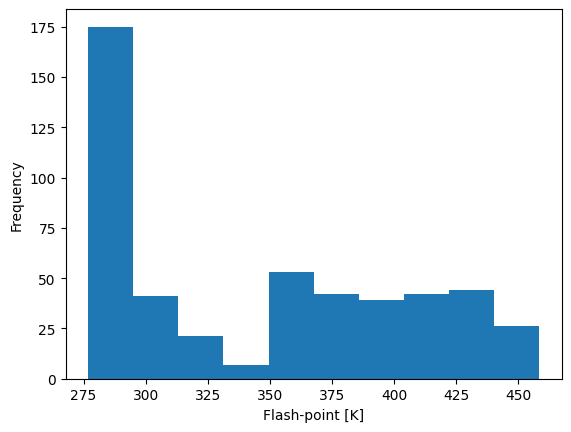

In [4]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="FP", legend=False)
plt.xlabel("Flash-point [K]")

plt.show()

Cumulative distribution:

<Figure size 800x600 with 0 Axes>

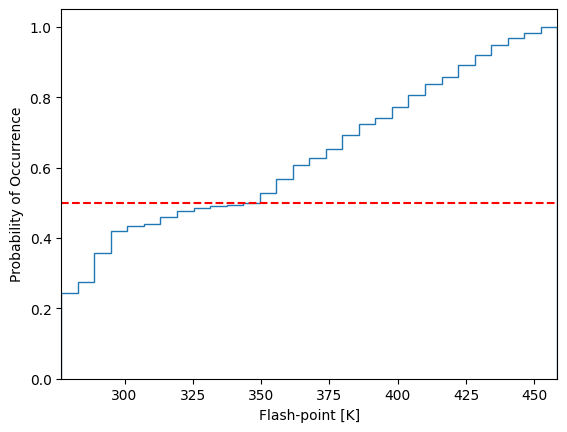

In [5]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="FP", bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.FP.min(), 
    xmax=df_all_data_points.FP.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.FP.min(), df_all_data_points.FP.max()))

plt.xlabel("Flash-point [K]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Molar Mass

Histrogram:

<Figure size 800x600 with 0 Axes>

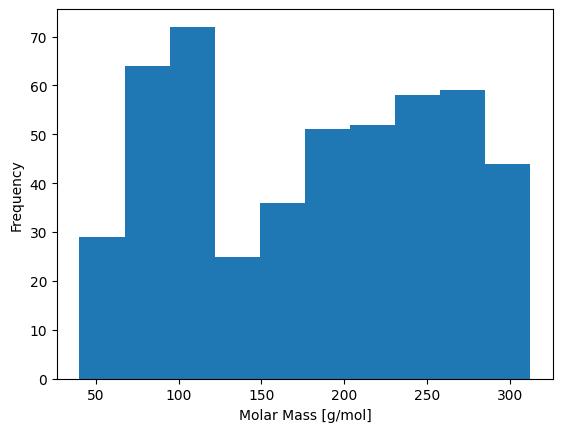

In [6]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="MM", legend=False)
plt.xlabel("Molar Mass [g/mol]")

plt.show()

Cumulative distribution:

<Figure size 800x600 with 0 Axes>

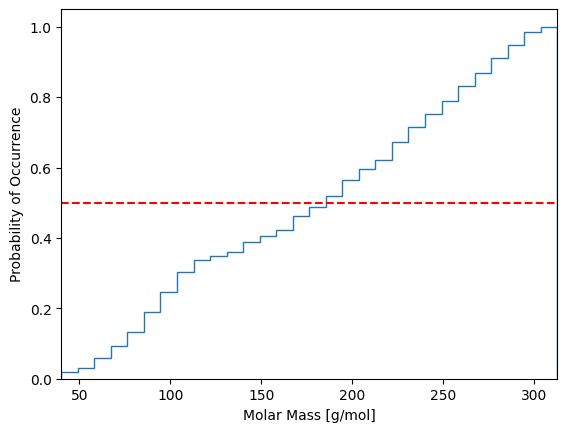

In [7]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column=["MM"], bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.MM.min(), 
    xmax=df_all_data_points.MM.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.MM.min(), df_all_data_points.MM.max()))

plt.xlabel("Molar Mass [g/mol]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### lnPvap

Frequency Histogram:

<Figure size 800x600 with 0 Axes>

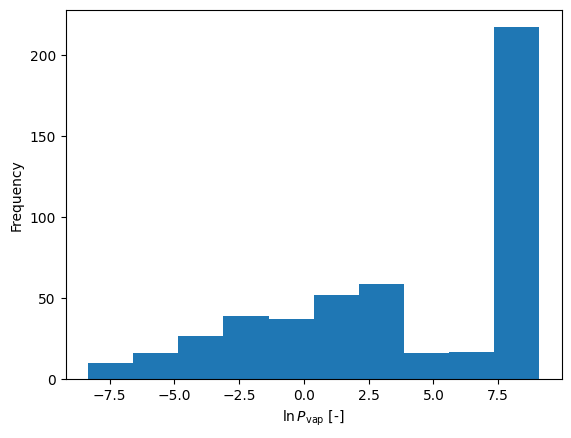

In [8]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="lnPvap", legend=False)
plt.xlabel(r"$\ln P_{\text{vap}}$ [-]")

plt.show()

Cumulative probability:

<Figure size 800x600 with 0 Axes>

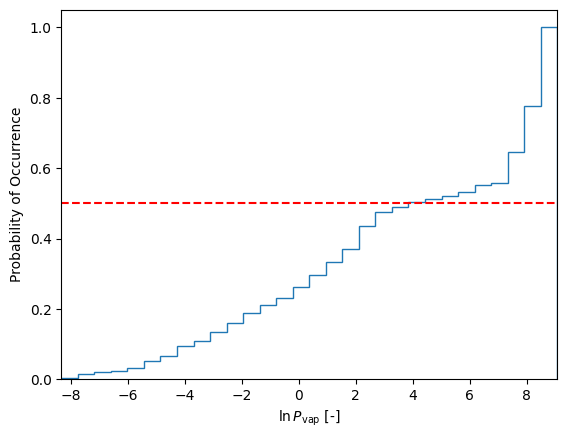

In [9]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="lnPvap", bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.lnPvap.min(), 
    xmax=df_all_data_points.lnPvap.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.lnPvap.min(), df_all_data_points.lnPvap.max()))

plt.xlabel(r"$\ln P_{\text{vap}}$ [-]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Number of Carbons

Frequency Histogram:

Check the number of bins (classes) we have to build the histogram by classes:

In [10]:
occurring_number_of_carbons = list(set(df_all_data_points['NC'].unique()))

number_classes_nc = len(occurring_number_of_carbons)

print(f"All number of carbons occurring in the dataset: {occurring_number_of_carbons}")
print(f"Total number of classes of different number of carbons: {number_classes_nc}")

All number of carbons occurring in the dataset: [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Total number of classes of different number of carbons: 18


<Figure size 800x600 with 0 Axes>

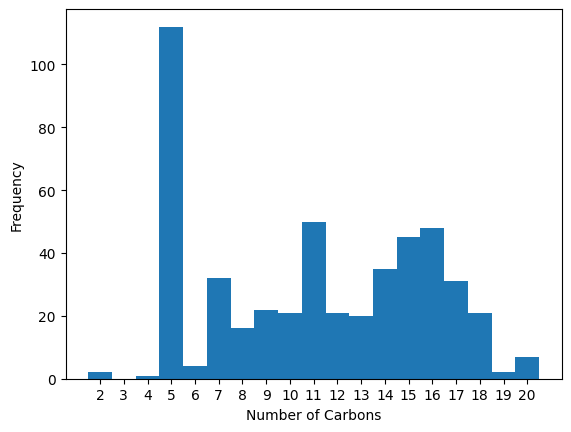

In [11]:
plt.figure(figsize=(8, 6))

# Calculate the bins to have have the classes properly centered in x-axis
min_nc = df_all_data_points["NC"].min()
max_nc = df_all_data_points["NC"].max()
bins = np.arange(min_nc - 0.5, max_nc + 1.5, 1)

df_all_data_points.plot.hist(column="NC", bins=bins, legend=False)

# A trick to have the bins centralized related to the x-axis classes
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)

plt.xlabel("Number of Carbons")

plt.show()

Cumulative probability:

<Figure size 800x600 with 0 Axes>

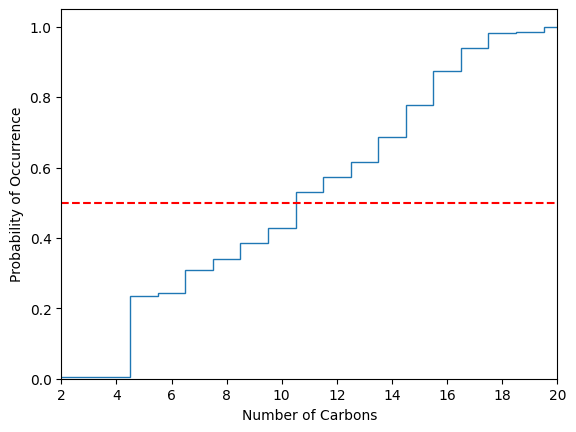

In [12]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="NC", bins=bins, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.NC.min(), 
    xmax=df_all_data_points.NC.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.NC.min(), df_all_data_points.NC.max()))

plt.xlabel("Number of Carbons")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Number of C=C bonds

Check the number of bins (classes) we have to build the histogram by classes:

In [13]:
occurring_number_of_double_bonds = list(set(df_all_data_points['C=C'].unique()))

number_classes_double_bonds = len(occurring_number_of_double_bonds)

print(f"All number of carbons occurring in the dataset: {occurring_number_of_double_bonds}")
print(f"Total number of classes of different number of carbons: {number_classes_double_bonds}")

All number of carbons occurring in the dataset: [0, 1, 2, 3]
Total number of classes of different number of carbons: 4


Frequency histogram:

<Figure size 800x600 with 0 Axes>

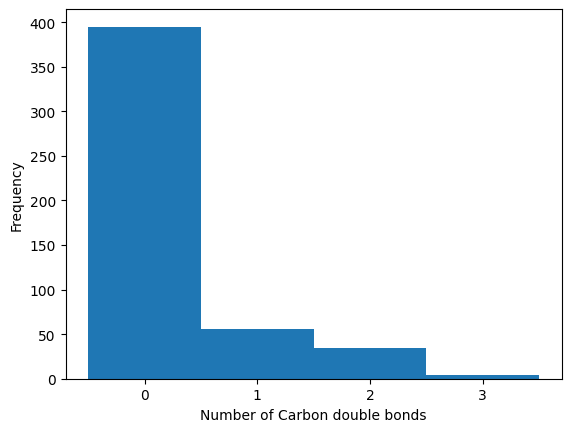

In [14]:
plt.figure(figsize=(8, 6))

# Calculate the bins to have have the classes properly centered in x-axis
min_nc = df_all_data_points["C=C"].min()
max_nc = df_all_data_points["C=C"].max()
bins = np.arange(min_nc - 0.5, max_nc + 1.5, 1)

df_all_data_points.plot.hist(column="C=C", bins=bins, legend=False)

# A trick to have the bins centralized related to the x-axis classes
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)

plt.xlabel("Number of Carbon double bonds")

plt.show()

Density probability:

<Figure size 800x600 with 0 Axes>

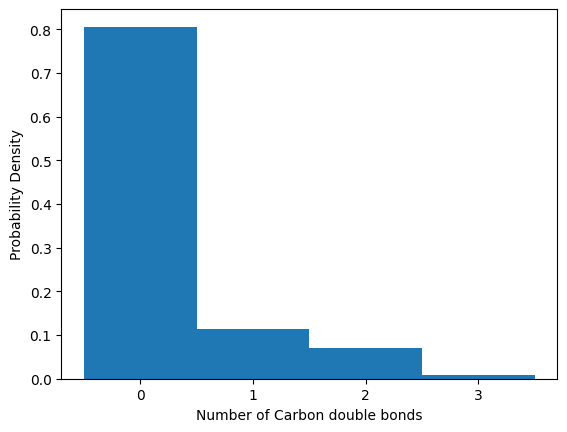

In [15]:
plt.figure(figsize=(8, 6))

# Calculate the bins to have have the classes properly centered in x-axis
min_nc = df_all_data_points["C=C"].min()
max_nc = df_all_data_points["C=C"].max()
bins = np.arange(min_nc - 0.5, max_nc + 1.5, 1)

df_all_data_points.plot.hist(column="C=C", bins=bins, legend=False, density=True)

# A trick to have the bins centralized related to the x-axis classes
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)

plt.xlabel("Number of Carbon double bonds")
plt.ylabel("Probability Density")

plt.show()

Cumulative probability (does not make sense in this case, there are too few classes):

<Figure size 800x600 with 0 Axes>

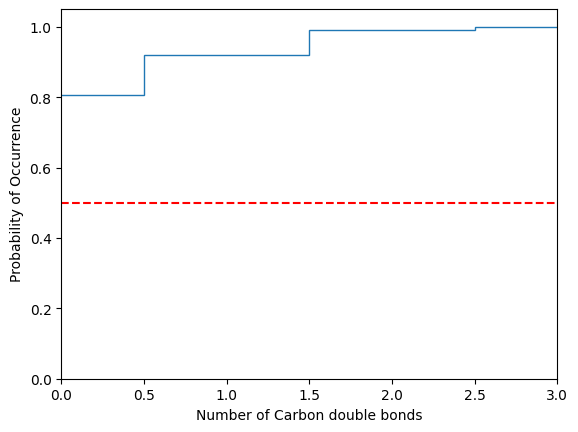

In [16]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="C=C", bins=bins, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points['C=C'].min(), 
    xmax=df_all_data_points['C=C'].max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points['C=C'].min(), df_all_data_points['C=C'].max()))

plt.xlabel("Number of Carbon double bonds")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Base entropy of the system

This quantity is the elemental entropy calculated based on each element that composes the molecules in the system (regardless of molar fractions of the components). The element entropy values are collected from [this CHNOSZ table](https://github.com/jedick/CHNOSZ/blob/main/inst/extdata/thermo/element.csv).

Frequency histogram:

<Figure size 800x600 with 0 Axes>

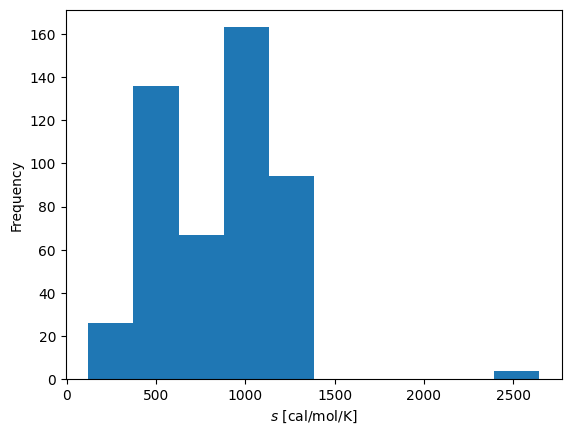

In [17]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(column="s", legend=False)
plt.xlabel(r"$s$ [cal/mol/K]")

plt.show()

Cumulative probability:

<Figure size 800x600 with 0 Axes>

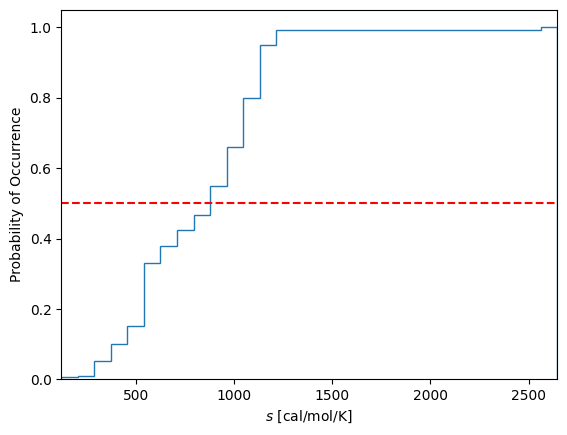

In [18]:
plt.figure(figsize=(8, 6))

df_all_data_points.plot.hist(
    column="s", bins=30, cumulative=True, density=True, histtype="step", legend=False
)

plt.hlines(
    y=0.5, 
    xmin=df_all_data_points.s.min(), 
    xmax=df_all_data_points.s.max(), 
    colors='r', 
    linestyles='--'
)

plt.xlim((df_all_data_points.s.min(), df_all_data_points.s.max()))

plt.xlabel(r"$s$ [cal/mol/K]")
plt.ylabel("Probability of Occurrence")

plt.show()

#### Systems

Check the number of bins (classes) we have to build the histogram by classes:

In [19]:
occurring_number_of_systems = list(set(df_all_data_points['System'].unique()))

number_classes_systems = len(occurring_number_of_systems)

print(f"All number of systems occurring in the dataset: {occurring_number_of_systems}")
print(f"Total number of classes of different systems: {number_classes_systems}")

All number of systems occurring in the dataset: ['Butanol + Ethyl Octanoate', 'Dodecane + Ethyl Octanoate', 'Ethanol + Ethyl Decanoate', 'Octane', 'Ethanol +Ethyl Oleate', 'Ethyl Palmitate', 'Dodecane + Ethyl Decanoate', 'Butanol + Ethyl Decanoate', 'Ethyl Decanoate + Ethyl Palmitate', 'Dodecane + Ethyl Laurate', 'Methyl Decanoate + Methyl Palmitate', 'Ethyl Decanoate + Ethyl Myristate', 'Ethanol', 'Ethyl Stearate', 'Methyl Butyrate + Ethanol', 'Propyl Acetate', 'Methyl Decanoate + Methyl Laurate', 'Ethyl Decanoate + Ethyl Linoleate', 'Dodecane + Ethyl Palmitate', 'Dodecane + Ethyl Stearate', 'Ethanol + Dodecane + Ethyl Linoleate', 'Ethanol + Dodecane + Ethyl Palmitate', 'Ethanol +Ethyl Linoleate', 'Dodecane + Ethyl Myristate', 'Methyl Stearate', 'Ethyl Myristate + Ethyl Linoleate', 'Methyl Myristate + Methyl Palmitate', 'Methyl Octanoate + Methyl Decanoate', 'Ethanol + Dodecane + Ethyl Stearate', 'Ethyl Decanoate + Ethyl Oleate', 'Ethyl Laurate + Ethyl Myristate', 'Ethanol + Dodecane 

Frequency histogram:

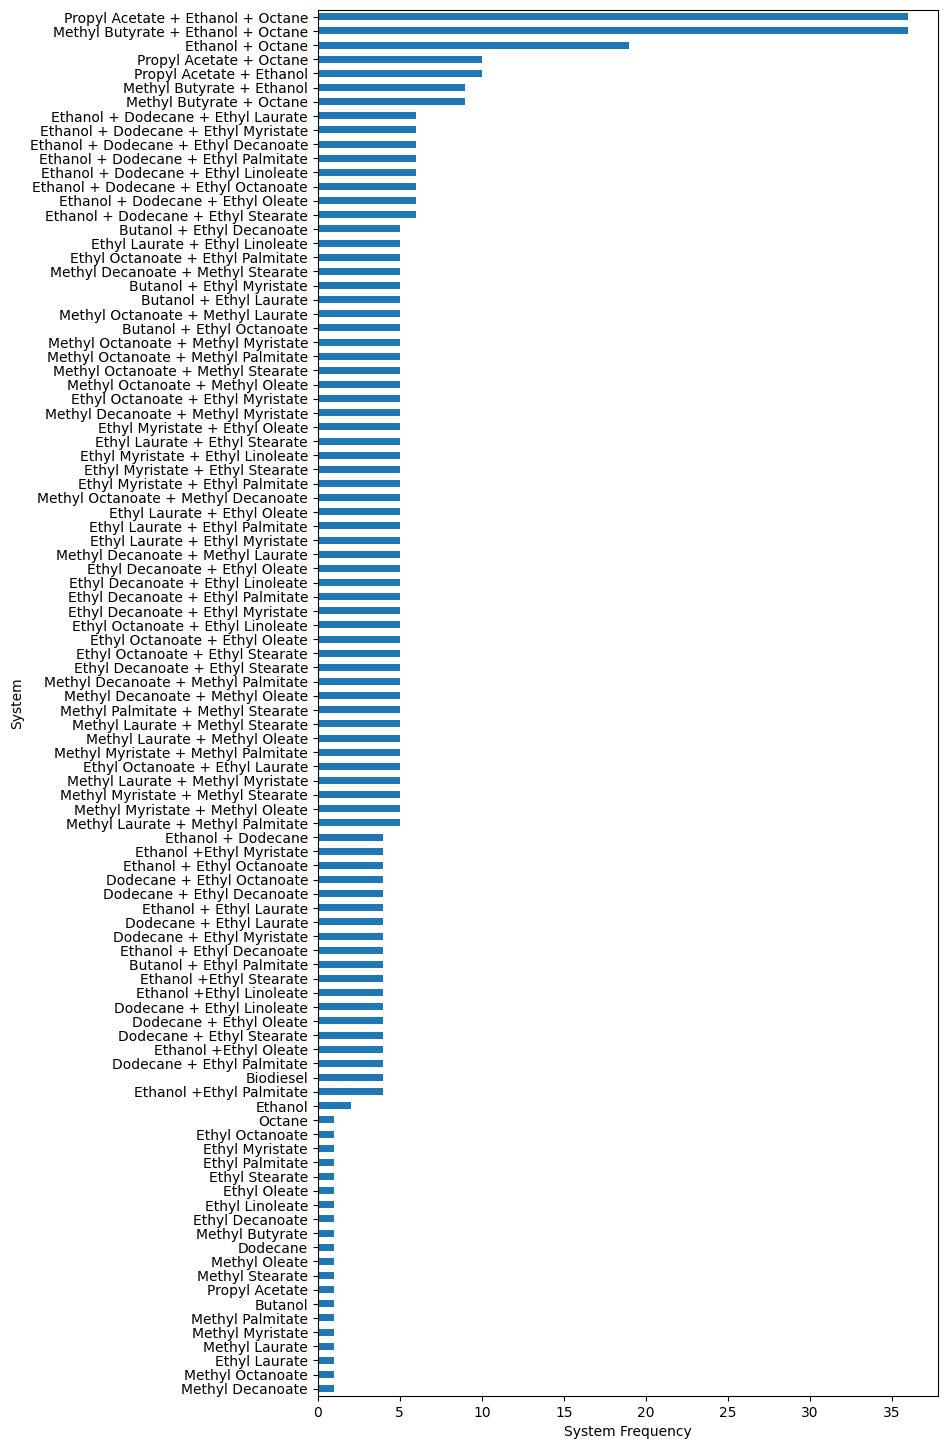

In [20]:
plt.figure(figsize=(8, 18))

df_all_data_points['System'].value_counts().sort_values(ascending=True).plot.barh(legend=False, width=0.5)

plt.xlabel("System Frequency")

plt.show()

Data imbalance distribution as percentages of each system:

df_

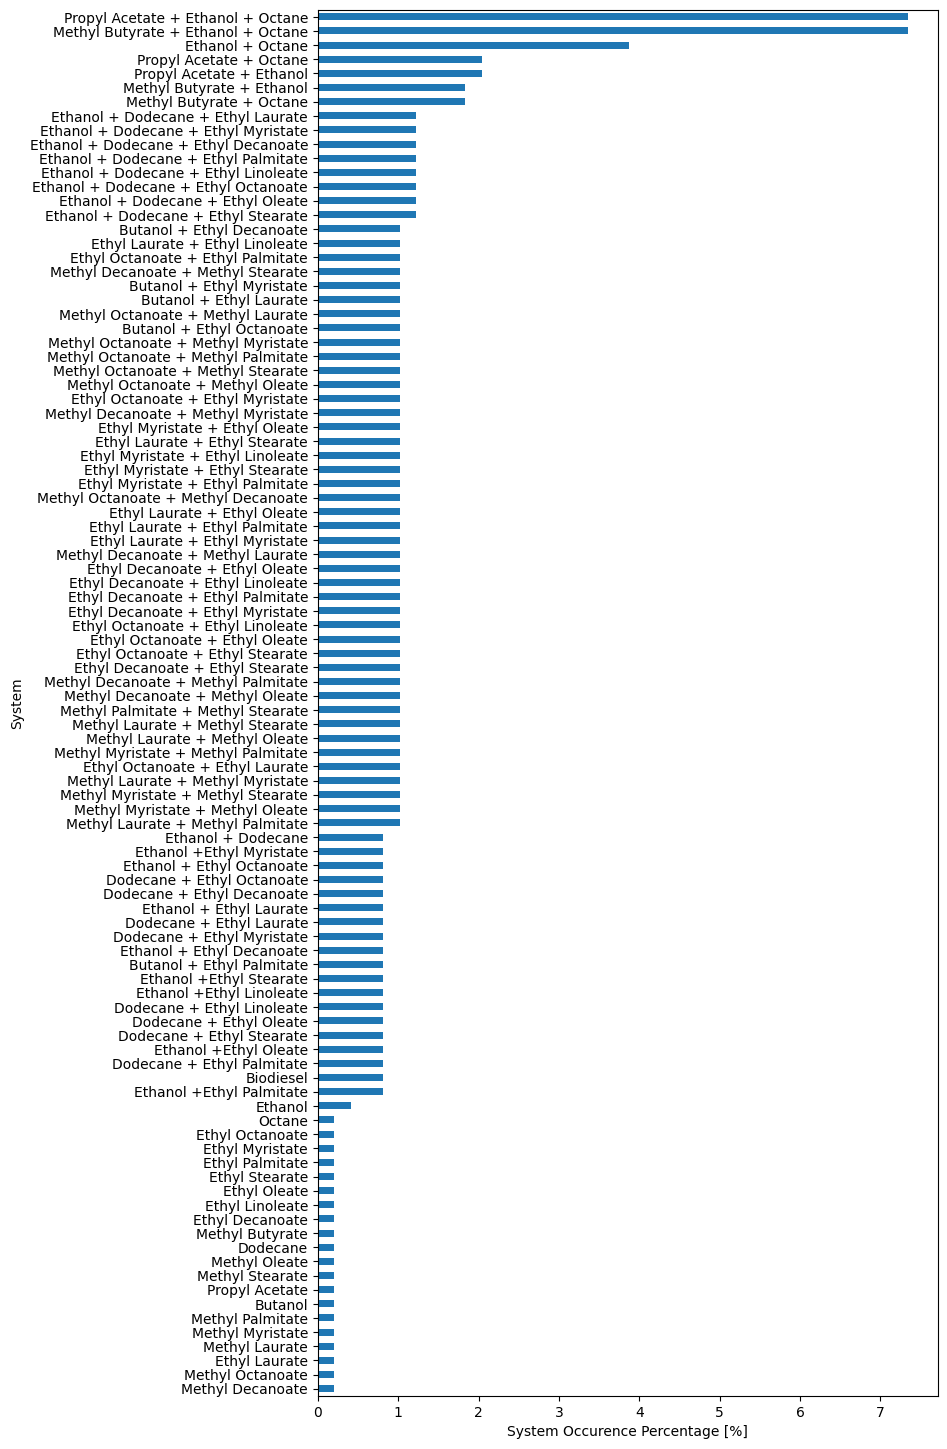

In [21]:
df_systems = df_all_data_points['System'].copy(deep=True)

df_systems_categories_percentages = df_systems.value_counts(normalize=True).sort_values(ascending=True) * 100

plt.figure(figsize=(8, 18))

df_systems_categories_percentages.plot.barh(legend=False, width=0.5)

plt.xlabel("System Occurence Percentage [%]")

plt.show()

In [22]:
df_systems_categories_percentages

System
Methyl Decanoate                      0.204082
Methyl Octanoate                      0.204082
Ethyl Laurate                         0.204082
Methyl Laurate                        0.204082
Methyl Myristate                      0.204082
                                        ...   
Propyl Acetate + Ethanol              2.040816
Propyl Acetate + Octane               2.040816
Ethanol + Octane                      3.877551
Methyl Butyrate + Ethanol + Octane    7.346939
Propyl Acetate + Ethanol + Octane     7.346939
Name: proportion, Length: 98, dtype: float64